<center>
<img src='images/logo.jpg' width='300px'>
<h2> Chương 3: CÁC PHƯƠNG PHÁP PHÁT HIỆN BIÊN TRONG ẢNH</h2>
</center>

---
* Bài toán phát hiện cạnh, biên (Edge Detection) được ứng dụng rất nhiều trong các bài toán về thị giác máy tính. Như trong các bài toán về trích xuất thông tin, nhận dạng đối tượng….

* Biên là nơi mã hóa nhiều thông tin ngữ nghĩa (semantics information) và hình dạng (shape) trong một bức ảnh.

* Điểm biên: Một điểm ảnh được coi là điểm biên nếu có sự thay đổi nhanh hoặc đột ngột về mức xám (hoặc màu). Ví dụ: trong ảnh nhị phân, điểm đen được coi là điểm biên nếu lân cận của nó có ít nhất một điểm trắng.
* Đường biên còn được gọi là đường bao (boundary): là tập hợp các điểm biên liên tiếp.

<img src='images/pic1.png' width='500px'>

**Nội dung bài học:**
1. Bài toán phát hiện cạnh (Edge detection) và ứng dụng
2. Các phương pháp phát hiện biên
3. Gradient base (1st order)
    1. Sobel edge detection
    2. Prewitt edge detection
    3. Roberts edge detection
4. Laplacian based (2nd order)
    1. Laplace edge detection
    2. Canny edge detection

<img src='images/pp.png' width='600px'>

---
*Copyright @dangvannam.FIT.HUMG*

In [1]:
#Khai báo sử dụng thư viện:
import numpy as np
import matplotlib.pyplot as plt
import cv2
print('Version OpenCV:', cv2.__version__)

Version OpenCV: 4.9.0


# A. Gradient base (1st order)
---
1. Sobel edge detection
2. Prewitt edge detection
3. Robert edge detection


## A.1. Sobel edge detection
---

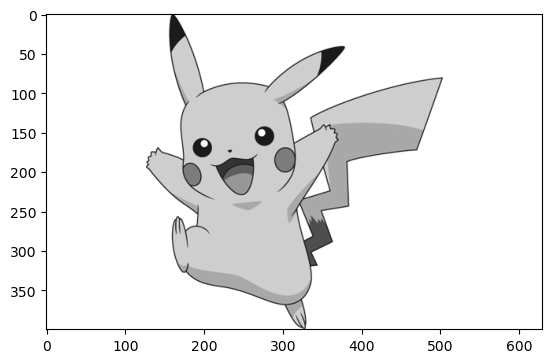

In [3]:
#Đọc ảnh ở chế độ ảnh xám:
img_orignal = cv2.imread('images/pikachu.jpeg',0)

#Hiển thị ảnh gốc:
plt.imshow(img_orignal,cmap='gray')
plt.show()

In [5]:
#Khởi tạo kernel Sobel theo hướng X:
sobel_x = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]])
print('Sobel theo hướng X:\n',sobel_x)

Sobel theo hướng X:
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


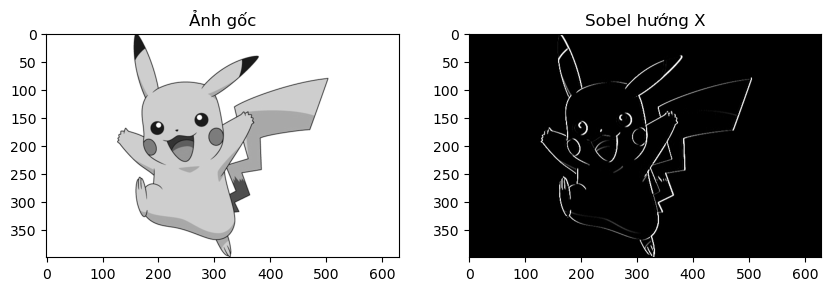

In [9]:
#Thực hiện lọc ảnh với kernel ở trên:
img_x = cv2.filter2D(img_orignal, -1, sobel_x)


#Hiển thị ảnh đã xử lý qua bộ lọc:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(img_orignal, cmap='gray')
plt.title('Ảnh gốc')

plt.subplot(1,2,2)
plt.imshow(img_x, cmap='gray')
plt.title("Sobel hướng X")
plt.show()


In [10]:
#Khởi tạo kernel sobel theo hướng Y:
sobel_y = np.array([[1,2,1],
                   [0,0,0],
                   [-1,-2,-1]])
print('Sobel hướng y:\n', sobel_y)

Sobel hướng y:
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


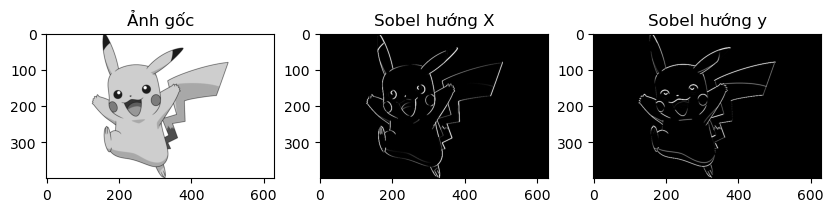

In [15]:
#Thực hiện lọc ảnh với kernel ở trên:
img_y = cv2.filter2D(img_orignal,-1,sobel_y)

#Hiển thị ảnh đã xử lý qua bộ lọc:
plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
plt.imshow(img_orignal, cmap='gray')
plt.title('Ảnh gốc')

plt.subplot(1,3,2)
plt.imshow(img_x, cmap='gray')
plt.title("Sobel hướng X")

plt.subplot(1,3,3)
plt.imshow(img_y, cmap='gray')
plt.title('Sobel hướng y')
plt.show()



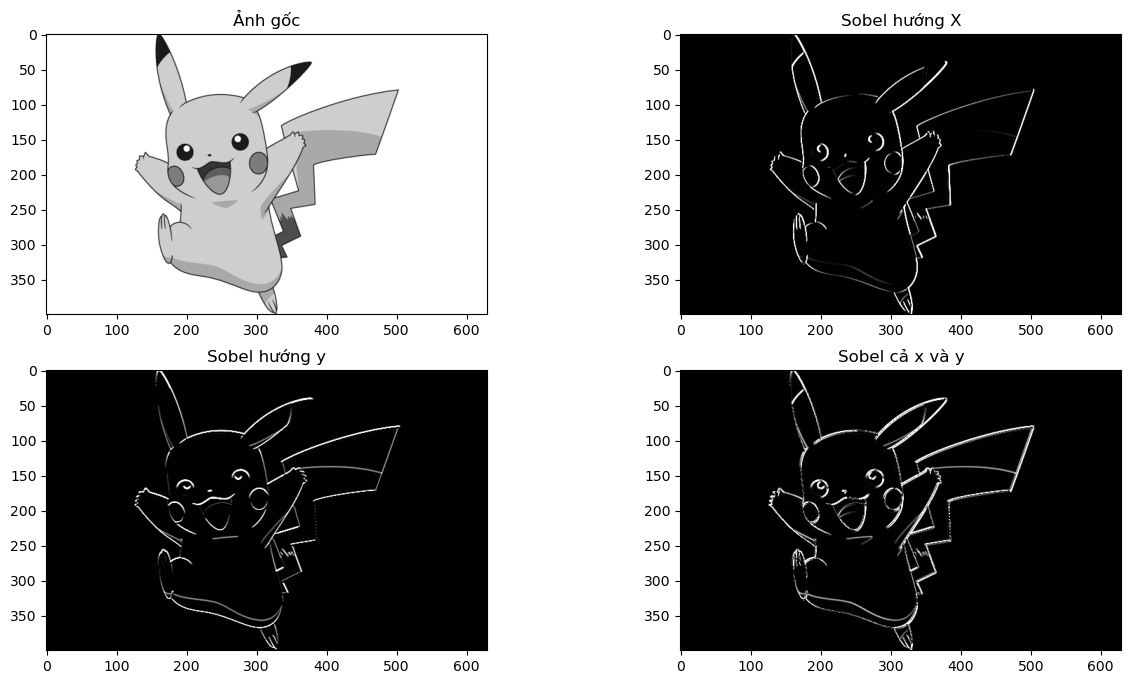

In [17]:
#kết hợp theo X, Y
img_xy = img_x + img_y

#Hiển thị ảnh đã xử lý qua bộ lọc:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.imshow(img_orignal, cmap='gray')
plt.title('Ảnh gốc')

plt.subplot(2,2,2)
plt.imshow(img_x, cmap='gray')
plt.title("Sobel hướng X")

plt.subplot(2,2,3)
plt.imshow(img_y, cmap='gray')
plt.title('Sobel hướng y')

plt.subplot(2,2,4)
plt.imshow(img_xy, cmap='gray')
plt.title('Sobel cả x và y')
plt.show()



#### Sử dụng phương thức Sobel của OpenCV:
---
**cv2.Sobel(original_image,ddepth,xorder,yorder,kernelsize)**

Trong đó:
1. Original_image: Ảnh gốc (ảnh xám)
2. ddepth: Độ sâu (-1 | cv2.CV_64F)
3. xorder: Cạnh theo trục x (=1)
4. yorder: Cạnh theo trục y (=1)
5. ksize: kích thước kernel sobel (3, 5, 7..)

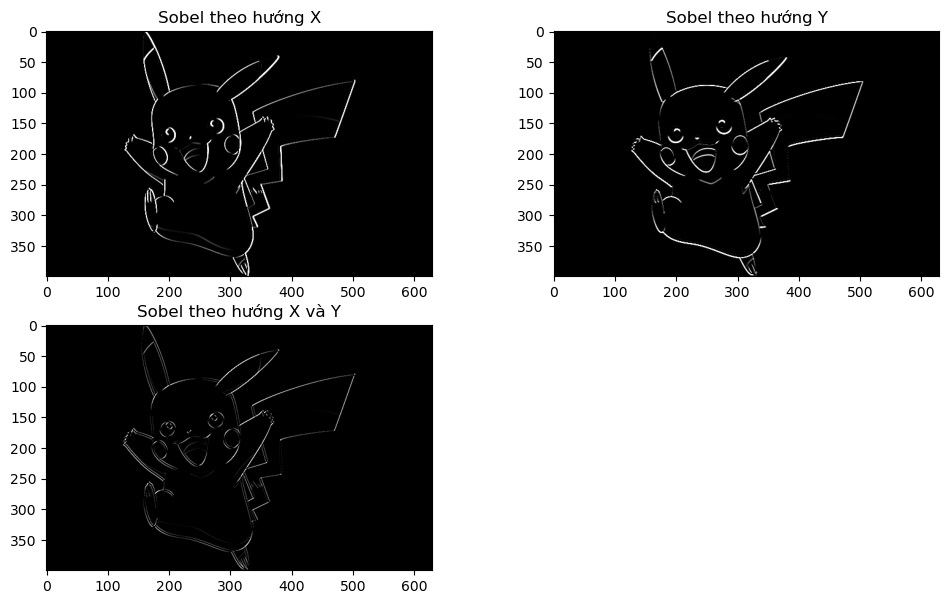

In [32]:
#Sử dụng phương thức Sobel của OpenCV:
img_sobelx = cv2.Sobel(img_orignal, -1, 1, 0, 5)
img_sobely = cv2.Sobel(img_orignal, -1, 0, 1, 5)
img_sobelxy = cv2.Sobel(img_orignal, -1, 1, 1, 5)


#Hiển thị ảnh gốc và ảnh sau khi sử dụng phương thức Sobel:
plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
plt.imshow(img_sobelx, cmap='gray')
plt.title('Sobel theo hướng X')

plt.subplot(2,2,2)
plt.imshow(img_sobely, cmap='gray')
plt.title('Sobel theo hướng Y')


plt.subplot(2,2,3)
plt.imshow(img_sobelxy, cmap='gray')
plt.title('Sobel theo hướng X và Y')

plt.show()



## THỰC HÀNH 3.1
---

1. Đọc và hiển thị ảnh Thuchanh3_1.jpg ở dạng ảnh xám
2. Sử dụng bộ lọc Sobel theo hướng x, y và XY. hiển thị kết quả.
3. Sử dụng phương thức Sobel với ksize = 7 theo X, Y và XY. Hiển thị kết quả.

<img src='images/Thuchanh3_1.jpg' width='500px'>

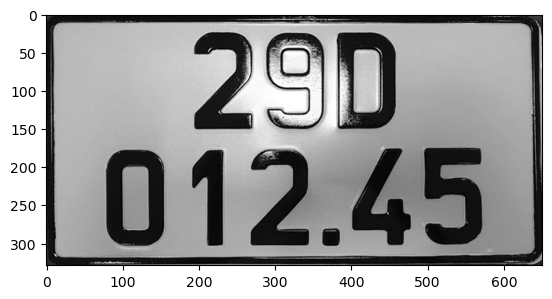

In [25]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}

img_so = cv2.imread('images/Thuchanh3_1.jpg',0)
plt.imshow(img_so, cmap='gray')
plt.show()



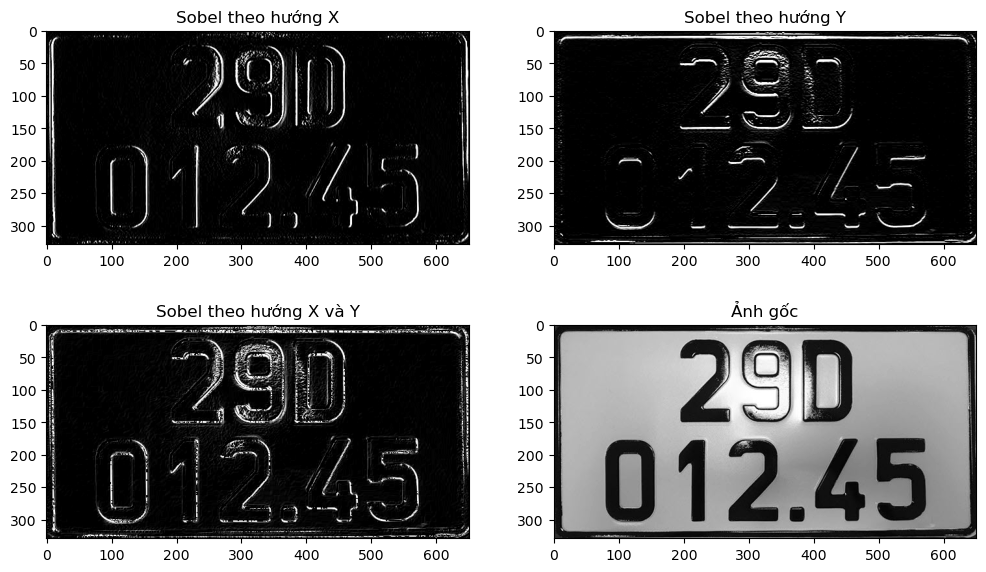

In [37]:
img_sox = cv2.Sobel(img_so, -1, 1, 0, 7)
img_soy = cv2.Sobel(img_so, -1, 0, 1, 7)
img_soxy = img_sox + img_soy

plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
plt.imshow(img_sox, cmap='gray')
plt.title('Sobel theo hướng X')

plt.subplot(2,2,2)
plt.imshow(img_soy, cmap='gray')
plt.title('Sobel theo hướng Y')

plt.subplot(2,2,3)
plt.imshow(img_soxy, cmap='gray')
plt.title('Sobel theo hướng X và Y')

plt.subplot(2,2,4)
plt.imshow(img_so, cmap='gray')
plt.title("Ảnh gốc")

plt.show()


## A.2 Prewitt edge detection
---

In [52]:
#Khởi tạo kernel prewitt theo hướng y:
prewitt_x = np.array([[-1,0,1],
                     [-1,0,1],
                     [-1,0,1]])

#Khởi tạo kernel prewitt theo hướng x:
prewitt_y = np.array([[-1,-1,-1],
                     [0,0,0],
                     [1,1,1]])
print(prewitt_x)
print(prewitt_y)


[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


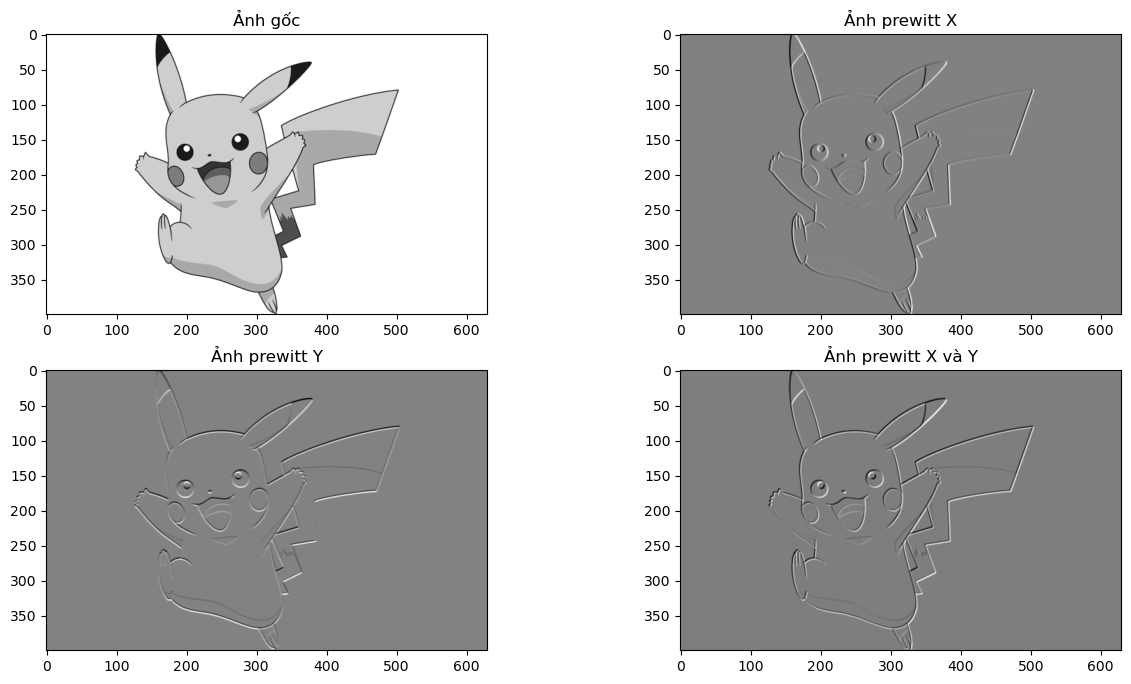

In [53]:
#Thực hiện lọc ảnh với kernel ở trên:
img_px = cv2.filter2D(img_orignal,cv2.CV_64F,prewitt_x)

#Thực hiện lọc ảnh với kernel ở trên:
img_py = cv2.filter2D(img_orignal,cv2.CV_64F,prewitt_y)

#kết hợp prewitt theo X, Y
img_pxy = img_px + img_py

#Hiển thị ảnh đã xử lý qua bộ lọc:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.imshow(img_orignal, cmap='gray')
plt.title('Ảnh gốc')

plt.subplot(2,2,2)
plt.imshow(img_px, cmap='gray')
plt.title('Ảnh prewitt X')

plt.subplot(2,2,3)
plt.imshow(img_py, cmap='gray')
plt.title('Ảnh prewitt Y')

plt.subplot(2,2,4)
plt.imshow(img_pxy, cmap='gray')
plt.title('Ảnh prewitt X và Y')

plt.show()



## A.3 Roberts Edge Detection
---
Bộ lọc Roberts có kích thước 2x2, do Lawrence Roberts đề xuất vào năm 1963, đây là một trong những bộ phát hiện cạnh đầu tiên.


In [55]:
#Khởi tạo kernel Roberts theo hướng X:
roberts_x = np.array([[1,0],
                     [0,-1]])


#Khởi tạo kernel Roberts theo hướng Y:
roberts_y = np.array([[0,1],
                     [-1,0]])

print(roberts_x,'\n', roberts_y)

[[ 1  0]
 [ 0 -1]] 
 [[ 0  1]
 [-1  0]]


<Figure size 1500x800 with 0 Axes>

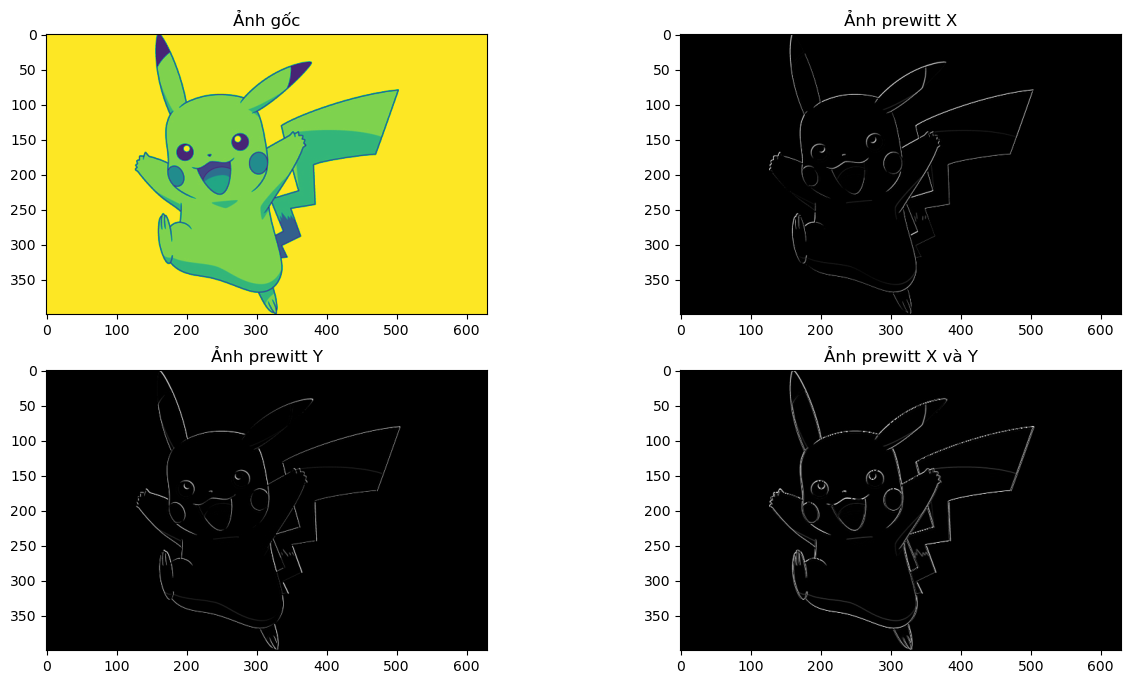

In [58]:
#Thực hiện lọc ảnh với kernel ở trên:
img_rx = cv2.filter2D(img_orignal,-1,roberts_x)

#Thực hiện lọc ảnh với kernel ở trên:
img_ry = cv2.filter2D(img_orignal,-1,roberts_y)

#kết hợp prewitt theo X, Y
img_rxy = img_rx + img_ry

#Hiển thị ảnh đã xử lý qua bộ lọc:
plt.figure(figsize=(15,8))
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.imshow(img_orignal)
plt.title('Ảnh gốc')

plt.subplot(2,2,2)
plt.imshow(img_rx, cmap='gray')
plt.title('Ảnh prewitt X')

plt.subplot(2,2,3)
plt.imshow(img_ry, cmap='gray')
plt.title('Ảnh prewitt Y')

plt.subplot(2,2,4)
plt.imshow(img_rxy, cmap='gray')
plt.title('Ảnh prewitt X và Y')

plt.show()






## THỰC HÀNH 3.2
---
1. Đọc ảnh và hiển thị ảnh Thuchanh3_2.jpeg ở dạng ảnh xám
2. Sử dụng bộ lọc Prewitt và Roberts phát hiện cạnh, hiển thị kết quả.
3. Sử dụng bộ lọc Robinson (trong Slide) phát hiện cạnh và hiển thị kết quả.

<img src='images/Thuchanh3_2.jpeg' width='300px'>

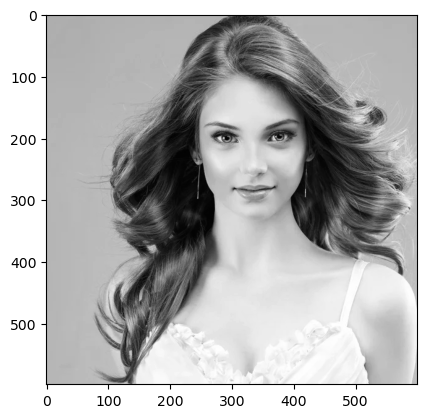

In [59]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}

img_32 = cv2.imread('images/Thuchanh3_2.jpeg',0)
plt.imshow(img_32,cmap='gray')
plt.show()



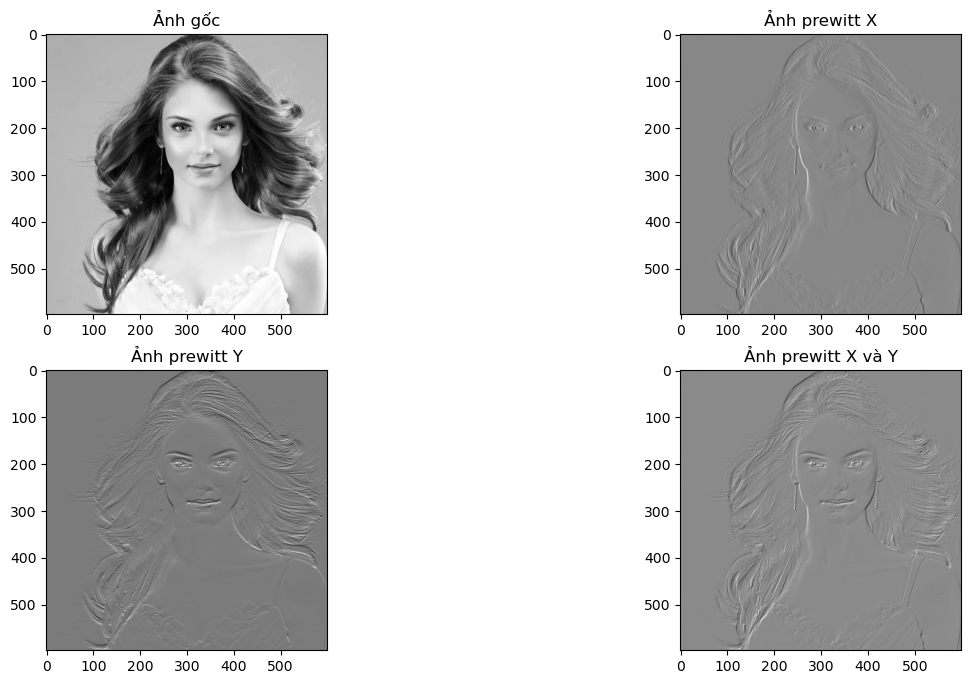

In [64]:
#prewitt
#Thực hiện lọc ảnh với kernel ở trên:
img_32x = cv2.filter2D(img_32,cv2.CV_64F,prewitt_x)

#Thực hiện lọc ảnh với kernel ở trên:
img_32y = cv2.filter2D(img_32,cv2.CV_64F,prewitt_y)

#kết hợp prewitt theo X, Y
img_32xy = img_32x + img_32y

#Hiển thị ảnh đã xử lý qua bộ lọc:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.imshow(img_32, cmap='gray')
plt.title('Ảnh gốc')

plt.subplot(2,2,2)
plt.imshow(img_32x, cmap='gray')
plt.title('Ảnh prewitt X')

plt.subplot(2,2,3)
plt.imshow(img_32y, cmap='gray')
plt.title('Ảnh prewitt Y')

plt.subplot(2,2,4)
plt.imshow(img_32xy, cmap='gray')
plt.title('Ảnh prewitt X và Y')

plt.show()

<Figure size 1500x800 with 0 Axes>

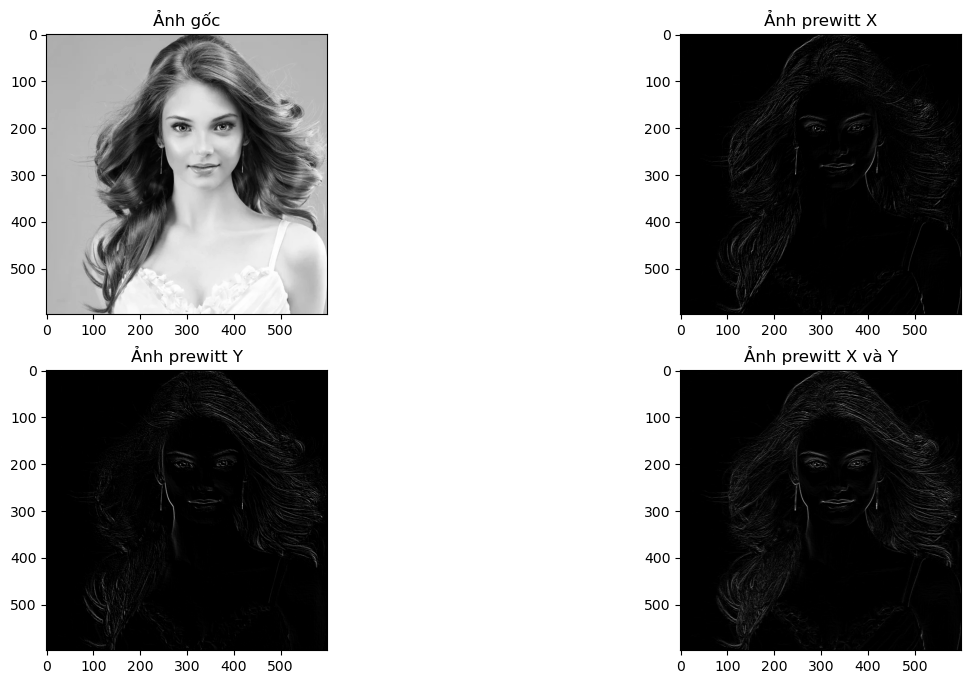

In [63]:
#Robert
#Thực hiện lọc ảnh với kernel ở trên:
img_32x = cv2.filter2D(img_32,-1,roberts_x)

#Thực hiện lọc ảnh với kernel ở trên:
img_32y = cv2.filter2D(img_32,-1,roberts_y)

#kết hợp prewitt theo X, Y
img_32xy = img_32x + img_32y

#Hiển thị ảnh đã xử lý qua bộ lọc:
plt.figure(figsize=(15,8))
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.imshow(img_32, cmap='gray')
plt.title('Ảnh gốc')

plt.subplot(2,2,2)
plt.imshow(img_32x, cmap='gray')
plt.title('Ảnh prewitt X')

plt.subplot(2,2,3)
plt.imshow(img_32y, cmap='gray')
plt.title('Ảnh prewitt Y')

plt.subplot(2,2,4)
plt.imshow(img_32xy, cmap='gray')
plt.title('Ảnh prewitt X và Y')

plt.show()

# B.Laplacian based (2nd order)
---
1. Laplacen edge detection
2. Canny edge detection

## B.1 Laplace edge detection
---
* Để khắc phục hạn chế và nhược điểm của phương pháp Gradient, trong đó sử dụng đạo hàm riêng bậc nhất người ta nghĩ đến việc sử dụng đạo hàm riêng bậc 2 hay toán tử Laplace.
* Phương pháp dò biên theo toán tử Laplace hiệu quả hơn phương pháp toán tử Gradient trong trường hợp mực xám biến đổi chậm, miền chuyển đổi mức xám có độ trải rộng.
* Toán tử Laplace dùng nhiều kiểu mặt nạ khác nhau để xấp xỉ rời rạc đạo hàm bậc hai. Ba kiểu mặt nạ hay dung với toán tử Laplace.


In [65]:
#Khởi tạo kernel 1:
kernel_lap1 = np.array([[ 0, 1, 0], 
                        [ 1,-4, 1],
                        [ 0,-1, 0]])

#Khởi tạo kernel 2:
kernel_lap2 = np.array([[-1,-1,-1], 
                        [-1, 8,-1],
                        [-1,-1,-1]])

#Khởi tạo kernel 3:
kernel_lap3 = np.array([[-1, 2,-1], 
                        [ 2,-4, 2],
                        [-1, 2,-1]])

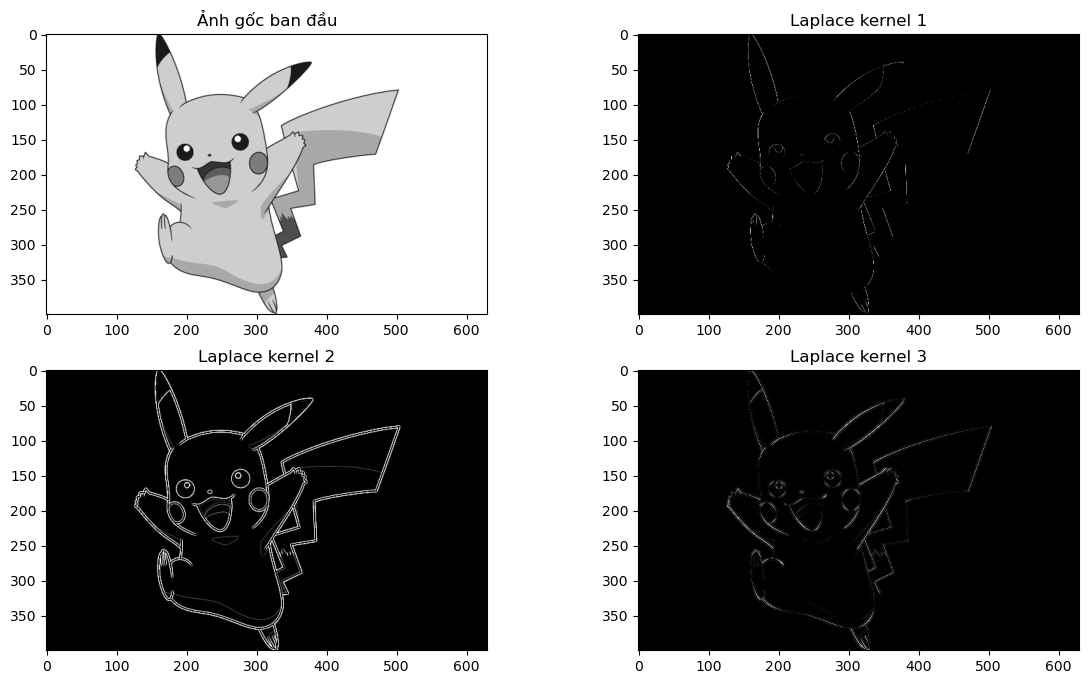

In [66]:
#Thực hiện lọc ảnh với kernel ở trên:
img_lap1 = cv2.filter2D(img_orignal, -1, kernel_lap1)
img_lap2 = cv2.filter2D(img_orignal, -1, kernel_lap2)
img_lap3 = cv2.filter2D(img_orignal, -1, kernel_lap3)

#Hiển thị kết quả:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.imshow(img_orignal,cmap='gray')
plt.title('Ảnh gốc ban đầu')

plt.subplot(2,2,2)
plt.imshow(img_lap1,cmap='gray')
plt.title('Laplace kernel 1')

plt.subplot(2,2,3)
plt.imshow(img_lap2,cmap='gray')
plt.title('Laplace kernel 2')

plt.subplot(2,2,4)
plt.imshow(img_lap3,cmap='gray')
plt.title('Laplace kernel 3')
plt.show()

## sử dụng phương thức Laplacian của Open CV:
---
**cv2.Laplacian(src, ddepth, ksize)**

Trong đó:
1. src: ảnh đầu vào
2. ddepth: Độ sâu (-1 | cv2.CV_64F)
3. ksize: Kích thước kernel

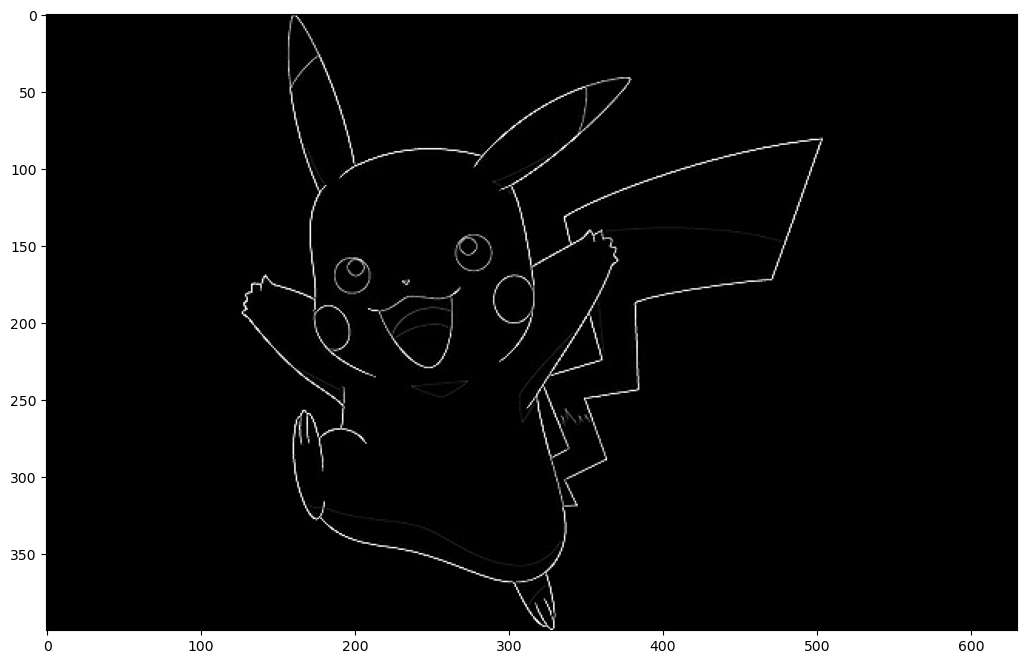

In [69]:
#Sử dụng phương thức Laplacian của OpenCV:
img_lp = cv2.Laplacian(img_orignal, -1, 5)

#Hiển thị kết quả:
plt.figure(figsize=(15,8))
plt.imshow(img_lp, cmap='gray')
plt.show()




## THỰC HÀNH 3.3
---
1. Đọc và hiển thị ảnh Thuchanh3_3.png. 
2. Sử dụng bộ lọc Lapacian trên ảnh nhiễu muối tiêu --> nhận xét kết quả khi lấy biên trên ảnh chưa khử nhiễu!

<img src = 'images/Thuchanh3_3.png' width = '300px'>

3. Sử dụng phương pháp đã học để khử nhiễu.
4. Áp dụng bộ lọc Lapacian trên ảnh đã làm trơn với ddepth = -1|CV_32FC4 và hiển thị kết quả. Xác định kSize phù hợp để cho ra kết quả tốt nhất!

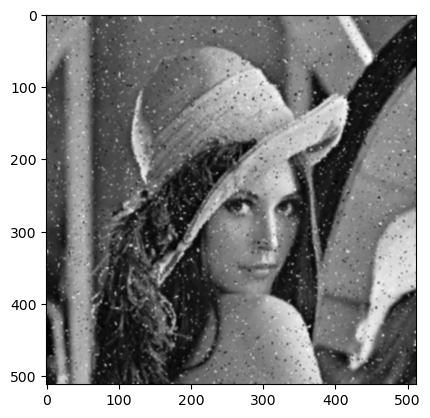

In [111]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
img_33 = cv2.imread('images/Thuchanh3_3.png',0)
img_33blur = cv2.GaussianBlur(img_33,(5,5),0)
plt.imshow(img_33blur,cmap='gray')
plt.show()

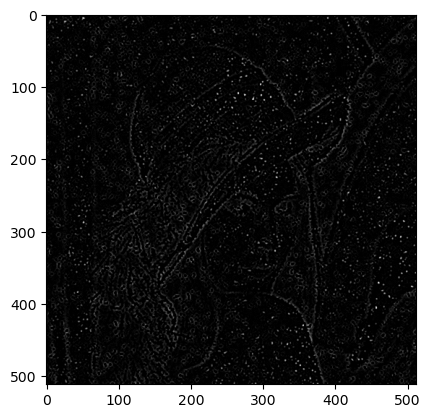

In [112]:
img_33lp = cv2.Laplacian(img_33blur, -1,7)
plt.imshow(img_33lp, cmap='gray')
plt.show()

### B.2 Canny edge detection
---
Phát hiện biên Canny do John Canny khởi xướng vào năm 1986. Là thuật toán được sử dụng phổ biến và hiệu quả trong việc xác định biên.

**cv2.Canny(image, T_lower, T_upper, aperture_size, L2Gradient)**

Trong đó:
1. Image: Input image to which Canny filter will be applied
2. T_lower: Lower threshold value in Hysteresis Thresholding
3. T_upper: Upper threshold value in Hysteresis Thresholding
4. aperture_size: Aperture size of the Sobel filter.
5. L2Gradient: Boolean parameter used for more precision in calculating Edge Gradient.


https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html

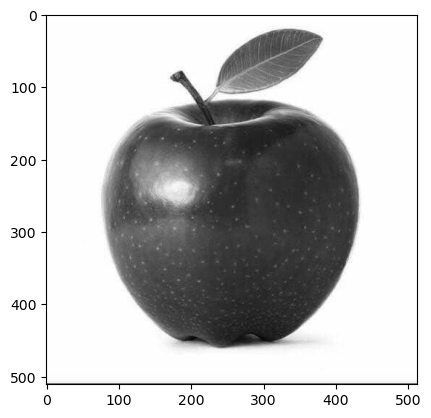

In [109]:
#Đọc ảnh pic_apple.jpeg ở chế độ ảnh xám:
img_orignal = cv2.imread('images/pic_apple.jpeg',0)


#Hiển thị ảnh gốc:
plt.imshow(img_orignal,cmap='gray')
plt.show()

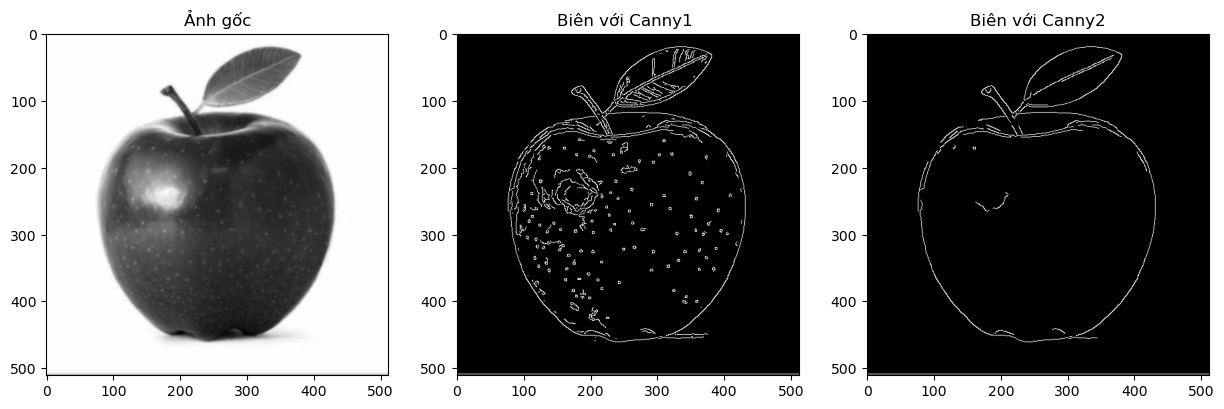

In [110]:
#Làm trơn với phương pháp Gaussian:
img_b = cv2.GaussianBlur(img_orignal,(5,5),0)

#Sử dụng phương thức canny:
img_canny1 = cv2.Canny(img_b, 20,80,5)
img_canny2 = cv2.Canny(img_b, 80,170,5)

#Hiển thị kết quả:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)

plt.imshow(img_b,cmap='gray')
plt.title('Ảnh gốc')

plt.subplot(1, 3, 2)
plt.imshow(img_canny1,cmap='gray')
plt.title('Biên với Canny1 ')

plt.subplot(1, 3, 3)
plt.imshow(img_canny2,cmap='gray')
plt.title('Biên với Canny2')

plt.show()

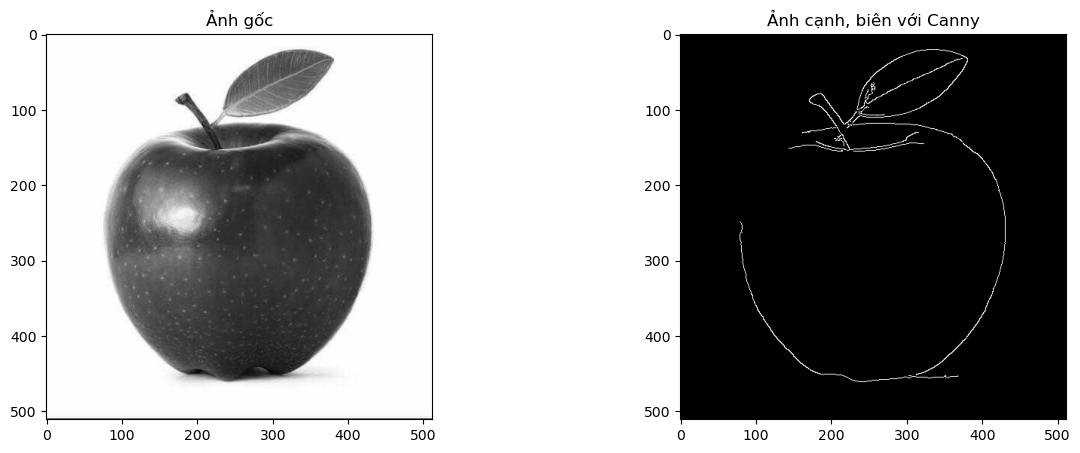

In [113]:
#Tự động xác định ngưỡng - Auto canny:
sigma = 1.1
median = np.median(img_b)
lower = int(max(0,(1.0-sigma)*median))
upper = int(min(255,(1.0+sigma)*median))
auto_canny = cv2.Canny(img_b,lower,upper,9)

#Hiển thị kết quả:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)

plt.imshow(img_orignal,cmap='gray')
plt.title('Ảnh gốc')

plt.subplot(1, 2, 2)
plt.imshow(auto_canny,cmap='gray')
plt.title('Ảnh cạnh, biên với Canny')

plt.show()

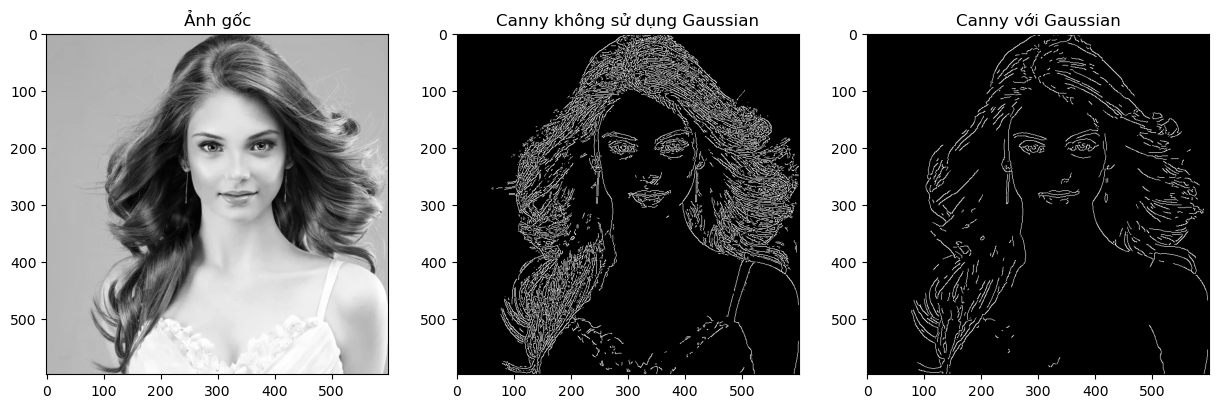

In [114]:
#Tác dụng của làm mịn khi lấy biên ảnh:
img_1 = cv2.imread('images/Thuchanh3_2.jpeg',0)


#Sử dụng phương thức canny trên ảnh gốc
img_edge1 = cv2.Canny(img_1, 80,100)

#làm mịn với Gaussian:
img_2 = cv2.GaussianBlur(img_1,(7,7),0,0)
#sử dụng phương thức canny trên ảnh sau khi làm mịn
img_edge2 = cv2.Canny(img_2, 80,100)

#Hiển thị ảnh gốc và ảnh thay đổi kích thước
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.imshow(img_1,cmap='gray')
plt.title('Ảnh gốc')

plt.subplot(1, 3, 2)
plt.imshow(img_edge1,cmap='gray')
plt.title('Canny không sử dụng Gaussian')

plt.subplot(1, 3, 3)
plt.imshow(img_edge2,cmap='gray')
plt.title('Canny với Gaussian')

plt.show()

# THỰC HÀNH 3.4
---
1. Đọc và hiển thị ảnh Thuchanh3_4.jpeg.
2. Sử dụng phương pháp Canny với các tham số phù hợp để thu được kết quả biên như trong slide.

<img src='images/Thuchanh3_4.jpeg' width='400px'>


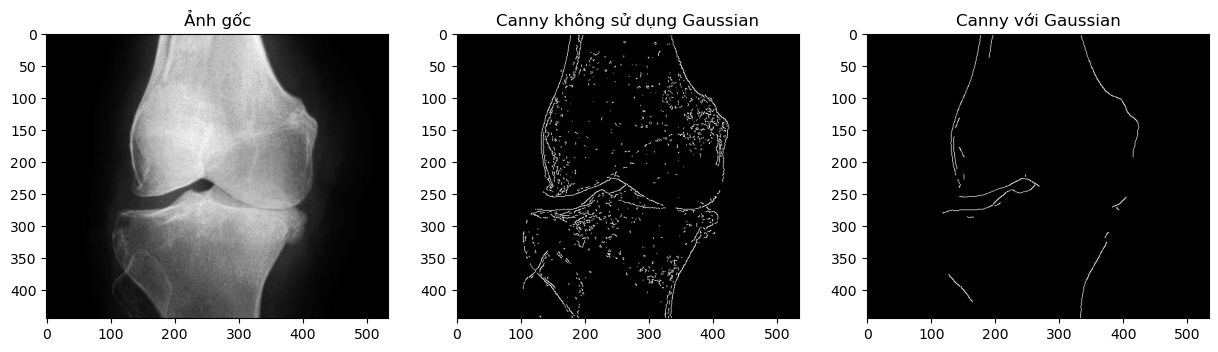

In [115]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
img_34 = cv2.imread('images/Thuchanh3_4.jpeg',0)
#Tác dụng của làm mịn khi lấy biên ảnh:


#Sử dụng phương thức canny trên ảnh gốc
img_edge1 = cv2.Canny(img_34, 80,100)

#làm mịn với Gaussian:
img_2 = cv2.GaussianBlur(img_34,(7,7),0,0)
#sử dụng phương thức canny trên ảnh sau khi làm mịn
img_edge2 = cv2.Canny(img_2, 80,100)

#Hiển thị ảnh gốc và ảnh thay đổi kích thước
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.imshow(img_34,cmap='gray')
plt.title('Ảnh gốc')

plt.subplot(1, 3, 2)
plt.imshow(img_edge1,cmap='gray')
plt.title('Canny không sử dụng Gaussian')

plt.subplot(1, 3, 3)
plt.imshow(img_edge2,cmap='gray')
plt.title('Canny với Gaussian')

plt.show()





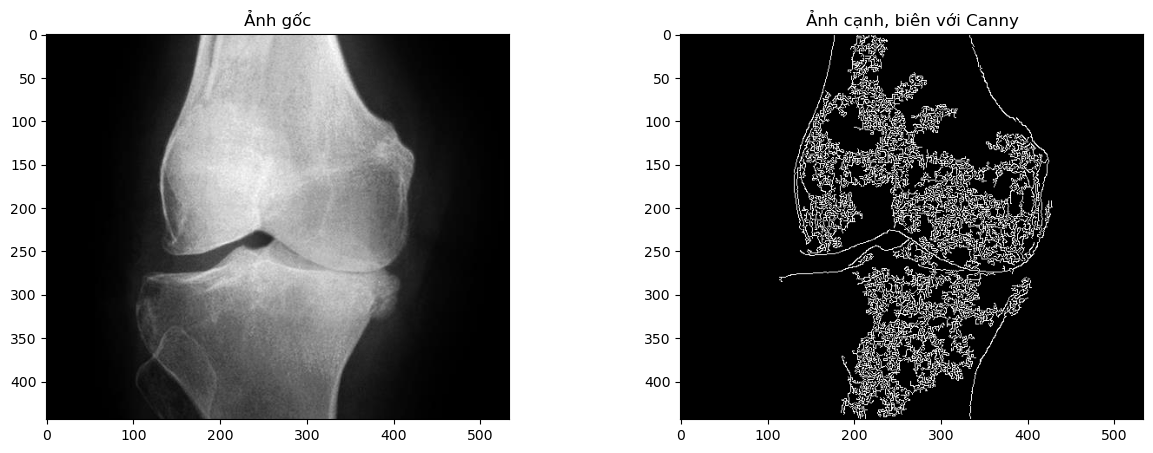

In [117]:
#Tự động xác định ngưỡng - Auto canny:
sigma = 1.1
median = np.median(img_b)
lower = int(max(0,(1.0-sigma)*median))
upper = int(min(255,(1.0+sigma)*median))
auto_canny = cv2.Canny(img_34,lower,upper,9)

#Hiển thị kết quả:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)

plt.imshow(img_34,cmap='gray')
plt.title('Ảnh gốc')

plt.subplot(1, 2, 2)
plt.imshow(auto_canny,cmap='gray')
plt.title('Ảnh cạnh, biên với Canny')

plt.show()

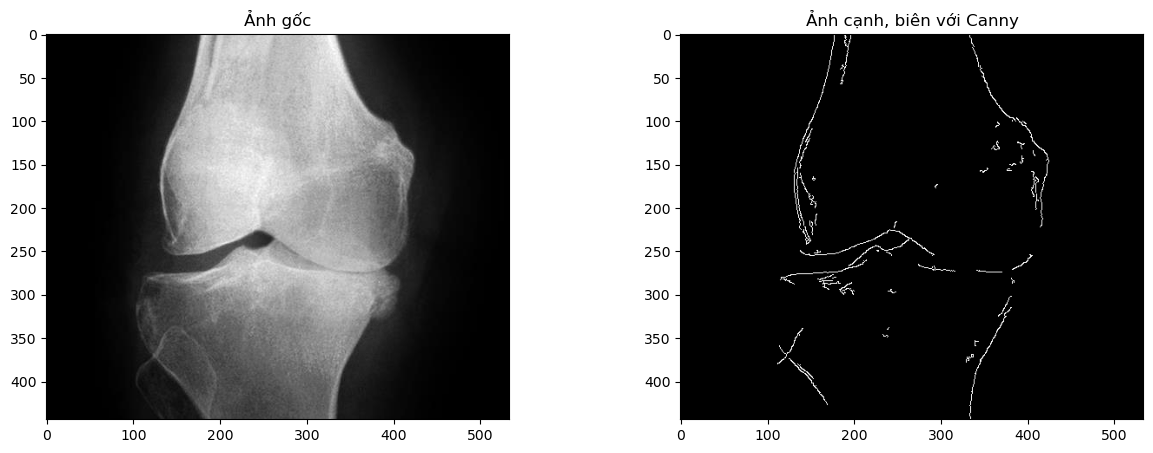

In [120]:
img_canny2 = cv2.Canny(img_34, 80,170,5)
#Hiển thị kết quả:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)

plt.imshow(img_34,cmap='gray')
plt.title('Ảnh gốc')

plt.subplot(1, 2, 2)
plt.imshow(img_canny2,cmap='gray')
plt.title('Ảnh cạnh, biên với Canny')

plt.show()